# **SISTEM PENDETEKSI JENIS TUMOR OTAK MEMANFAATKAN MACHINE LEARNING DENGAN ALGORITMA *CONVULUTIONAL NEURAL NETWORK (CNN)***

**Dataset:** https://www.kaggle.com/datasets/denizkavi1/brain-tumor

In [1]:
from google.colab import drive
from google.colab import files
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

!pip install split-folders
import splitfolders

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Dataset/braintumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/braintumor1')
zip_ref.close()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CATATAN**

jika koneksi ke drive masih terhubung, namun koneksi sesama blok program terputus, maka jangan jalankan dari atas. Cukup jalankan blok program peng-*import*-an dan blok program ini agar tidak membuat file ektrak baru.

In [5]:
base_dir = '/content/braintumor1'
splitfolders.ratio(base_dir, output='/content/braintumor1', seed=1337,ratio=(.75,.25))
train_dir = os.path.join('/content/braintumor1', 'train')
validation_dir = os.path.join('/content/braintumor1','val')

Copying files: 3064 files [00:04, 710.65 files/s]


In [6]:
train_dir = '/content/braintumor1/train'
validation_dir = '/content/braintumor1/val'

In [7]:
os.listdir('/content/braintumor1/train')

['1', '3', '2']

In [8]:
os.listdir('/content/braintumor1/val')

['1', '3', '2']

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

Found 2297 images belonging to 3 classes.
Found 767 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              activation="relu",
                              input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                   

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
h= model.fit( train_generator,
              epochs=25,
              steps_per_epoch=len(train_generator),
              validation_data=validation_generator )

Epoch 1/25
575/575 [==============================] - 75s 109ms/step - loss: 0.7232 - accuracy: 0.6761 - val_loss: 0.6318 - val_accuracy: 0.6897
Epoch 2/25
575/575 [==============================] - 62s 107ms/step - loss: 0.5457 - accuracy: 0.7397 - val_loss: 0.4524 - val_accuracy: 0.7575
Epoch 3/25
575/575 [==============================] - 62s 108ms/step - loss: 0.4722 - accuracy: 0.7915 - val_loss: 0.4770 - val_accuracy: 0.7901
Epoch 4/25
575/575 [==============================] - 68s 118ms/step - loss: 0.3933 - accuracy: 0.8311 - val_loss: 0.3748 - val_accuracy: 0.8409
Epoch 5/25
575/575 [==============================] - 63s 110ms/step - loss: 0.3370 - accuracy: 0.8507 - val_loss: 0.4137 - val_accuracy: 0.8331
Epoch 6/25
575/575 [==============================] - 60s 104ms/step - loss: 0.3169 - accuracy: 0.8768 - val_loss: 0.3397 - val_accuracy: 0.8592
Epoch 7/25
575/575 [==============================] - 60s 105ms/step - loss: 0.2998 - accuracy: 0.8764 - val_loss: 0.3292 - val_ac

In [14]:
model.evaluate(validation_generator)

192/192 [==============================] - 15s 78ms/step - loss: 0.3651 - accuracy: 0.8931


[0.36510229110717773, 0.8930899500846863]

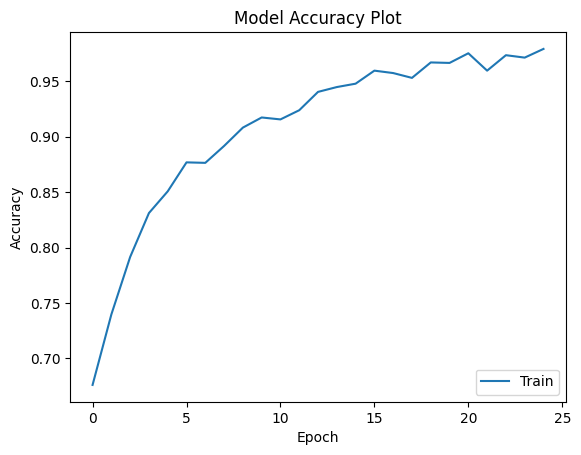

In [15]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

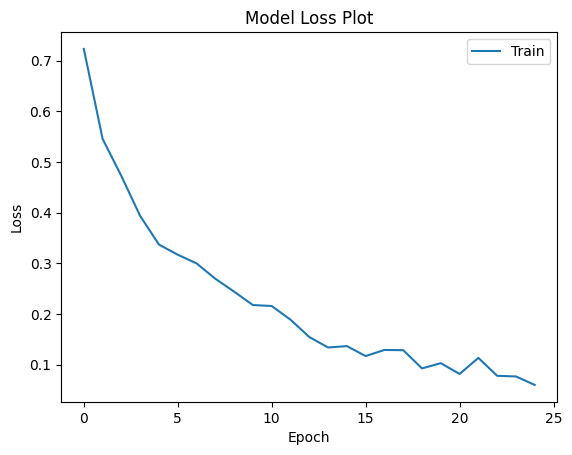

In [16]:
plt.plot(h.history['loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Saving R (3).jpg to R (3).jpg
1/1 [==============================] - 0s 103ms/step
R (3).jpg


		 SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS PITUITARY DALAM HASIL MRI


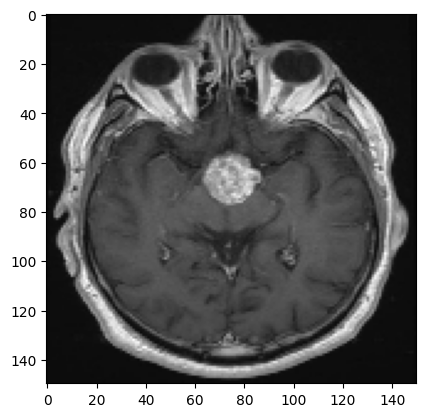

In [17]:
uploaded = files.upload()

for fn in uploaded.keys():
      path = fn
      img = image.load_img(path, target_size=(150,150))

      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])

      classes = model.predict(images, batch_size=10)
      print(fn)
      if classes[0,0]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS MENINGIOMA DALAM HASIL MRI')
      elif classes[0,1]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS GLIOMA DALAM HASIL MRI')
      elif classes[0,2]!=0:
        print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS PITUITARY DALAM HASIL MRI')
